In [1]:
import anndata as ad
import os
from python.spatial_query import spatial_query
from spatial_query_multiple_fov import spatial_query_multi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

In [2]:
data_path = "/Users/sa3520/BWH/spatial query/python/data/HBM987_KWLK_254/"

# adata_expr = ad.read_h5ad(os.path.join(data_path, 'expr.h5ad'))
adata = ad.read_h5ad(os.path.join(data_path, 'secondary_analysis.h5ad'))
fig_size = (8, 4)

In [3]:
adata

AnnData object with n_obs × n_vars = 4058 × 26265
    obs: 'n_genes', 'n_counts', 'leiden', 'umap_density', 'predicted.ASCT.celltype', 'predicted.ASCT.celltype.score'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'annotation_metadata', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_params'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'X_umap_proj'
    varm: 'PCs'
    layers: 'spliced', 'spliced_unspliced_sum', 'unscaled', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
spatial_key = 'X_spatial'
label_key = 'predicted.ASCT.celltype'

In [5]:
# Test building kd tree
tt = spatial_query(adata=adata, spatial_key=spatial_key, label_key=label_key, leaf_size=10)

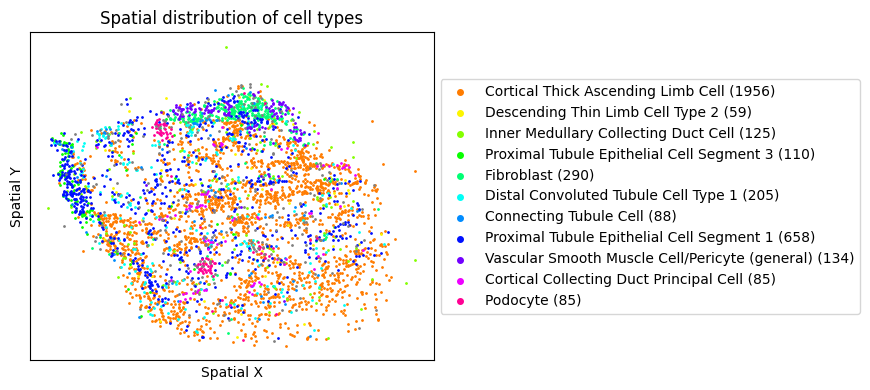

In [6]:
tt.plot_fov(fig_size=fig_size)

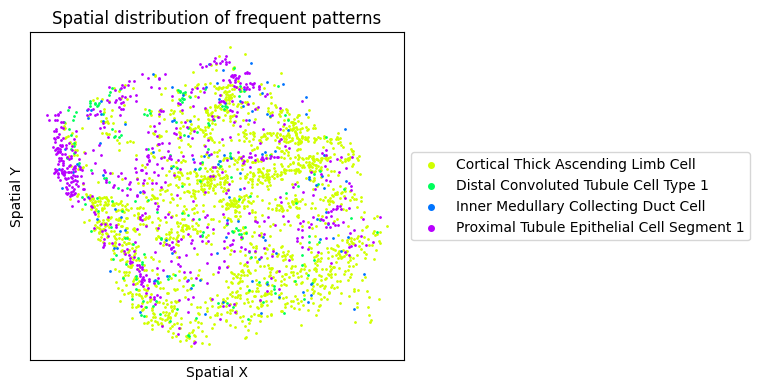

In [7]:
# Test frequent patterns of fov
max_dist = 150
min_size = 4
min_count = 10
min_support = 0.4
dis_duplicates=True # if distinguish duplicates of cell types in neighborhood


fp_tree =tt.find_patterns_grid(max_dist=max_dist,
                               min_size=min_size,
                               min_count=min_count,
                               min_support=min_support, 
                               dis_duplicates=dis_duplicates,
                               if_display=True,
                               fig_size = (7, 4)
                              ) 

In [8]:
# for s, items in zip(fp_tree['support'], fp_tree['itemsets']):
#     print(f"support={s}, \nitems={set(items)} \n")
fp_tree

,support,itemsets
0,0.425121,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
1,0.417874,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
2,0.415459,"[Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell]"
3,0.415459,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
4,0.415459,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
5,0.410628,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell]"
6,0.403382,"[Cortical Thick Ascending Limb Cell, Inner Medullary Collecting Duct Cell, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell]"
7,0.403382,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Inner Medullary Collecting Duct Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
8,0.403382,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
9,0.400966,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Inner Medullary Collecting Duct Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"


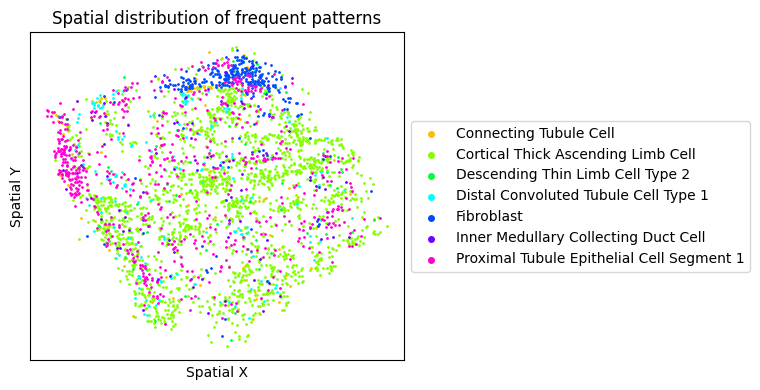

In [9]:
# Test frequent patterns of fov
max_dist = 150
min_size = 4
min_count = 10
min_support = 0.3
dis_duplicates=False # only consider the multiplicity of cell types in neighborhoods, not the frequnecy of occurrence of cell types


fp_tree =tt.find_patterns_grid(max_dist=max_dist,
                               min_size=min_size,
                               min_count=min_count,
                               min_support=min_support, 
                               dis_duplicates=dis_duplicates,
                               if_display=True,
                               fig_size = (7, 4)
                              ) 

In [10]:
fp_tree

,support,itemsets
0,0.335749,"(Inner Medullary Collecting Duct Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Proximal Tubule Epithelial Cell Segment 1)"
1,0.326087,"(Descending Thin Limb Cell Type 2, Cortical Thick Ascending Limb Cell)"
2,0.311594,"(Cortical Thick Ascending Limb Cell, Fibroblast)"
3,0.304348,"(Connecting Tubule Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1)"
4,0.301932,"(Descending Thin Limb Cell Type 2, Proximal Tubule Epithelial Cell Segment 1)"


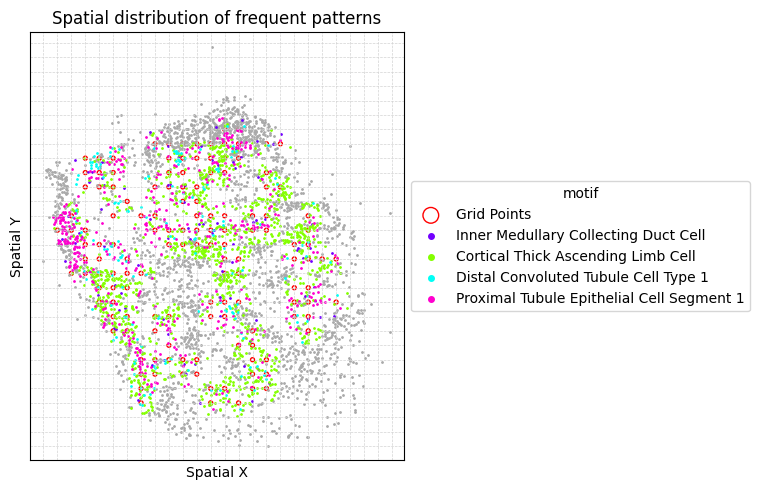

In [11]:
motif = ['Inner Medullary Collecting Duct Cell', 
         'Distal Convoluted Tubule Cell Type 1', 
         'Cortical Thick Ascending Limb Cell', 
         'Proximal Tubule Epithelial Cell Segment 1']
tt.plot_motif_grid(motif=motif, 
                   max_dist=max_dist, min_count=min_count, min_support=min_support, min_size=min_size,
                   fig_size=(7,5))

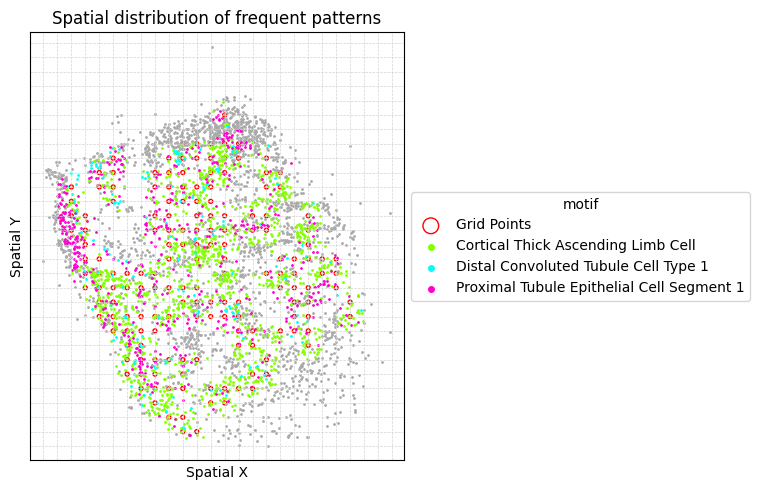

In [12]:
motif = ['Distal Convoluted Tubule Cell Type 1', 
         'Proximal Tubule Epithelial Cell Segment 1', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Proximal Tubule Epithelial Cell Segment 1']
tt.plot_motif_grid(motif=motif, 
                   max_dist=max_dist, min_count=min_count, min_support=min_support, min_size=min_size,
                   fig_size=(7,5))

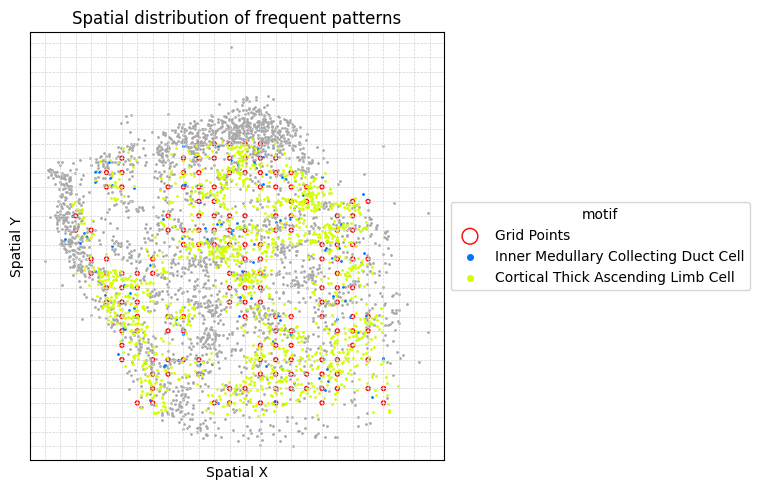

In [13]:
motif = ['Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Inner Medullary Collecting Duct Cell']
min_support=0.5
tt.plot_motif_grid(motif=motif, 
                   max_dist=max_dist, min_count=min_count, min_support=min_support, min_size=min_size,
                   fig_size=(7,5))

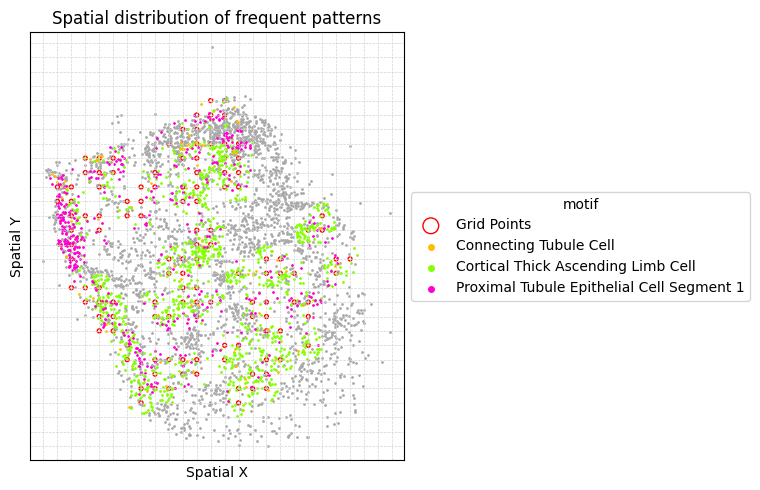

In [14]:
motif = ['Cortical Thick Ascending Limb Cell', 'Connecting Tubule Cell', 'Proximal Tubule Epithelial Cell Segment 1']
dis_duplicates = False
min_support=0.3
tt.plot_motif_grid(motif=motif, 
                   max_dist=max_dist, min_count=min_count, min_support=min_support, min_size=min_size,
                   dis_duplicates=dis_duplicates,
                   fig_size=(7,5))

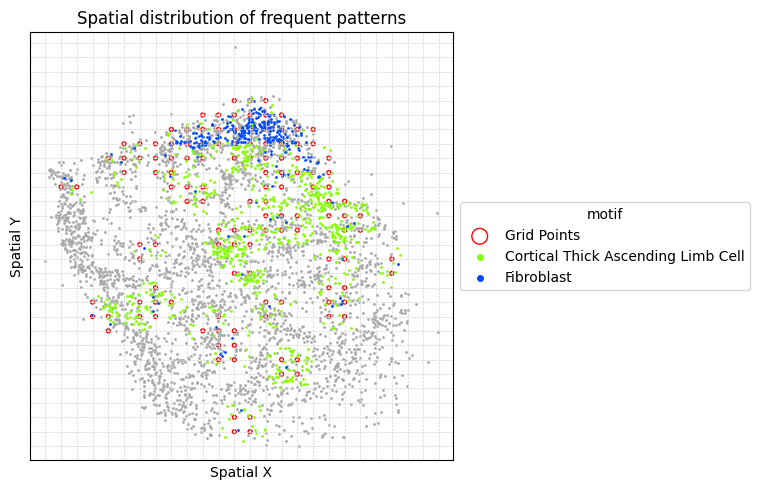

In [15]:
motif = ['Cortical Thick Ascending Limb Cell', 'Fibroblast']

tt.plot_motif_grid(motif=motif, 
                   dis_duplicates=dis_duplicates,
                   max_dist=max_dist, min_count=min_count, min_support=min_support, min_size=min_size, 
                   fig_size=(7,5))

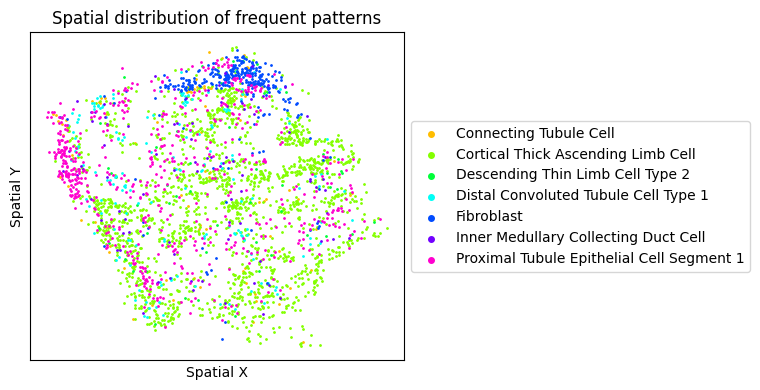

In [16]:
max_dist = 150
n_points = 1000
min_support = 0.3
min_size = 4
min_count = 10
dis_duplicates = False
fp_tree = tt.find_patterns_rand(max_dist=max_dist,
                                n_points=n_points,
                                min_support=min_support,
                                dis_duplicates=dis_duplicates,
                                min_size=min_size,
                                min_count=min_count,
                                if_display=True,
                                fig_size=(7, 4), 
                                seed=0)

In [17]:
# for s, items in zip(fp_tree['support'], fp_tree['itemsets']):
#     print(f"support={s}, \nitems={set(items)} \n")
fp_tree

,support,itemsets
0,0.336879,"(Connecting Tubule Cell, Cortical Thick Ascending Limb Cell)"
1,0.335106,"(Inner Medullary Collecting Duct Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Proximal Tubule Epithelial Cell Segment 1)"
2,0.308511,"(Connecting Tubule Cell, Proximal Tubule Epithelial Cell Segment 1)"
3,0.304965,"(Descending Thin Limb Cell Type 2, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1)"
4,0.303191,(Fibroblast)


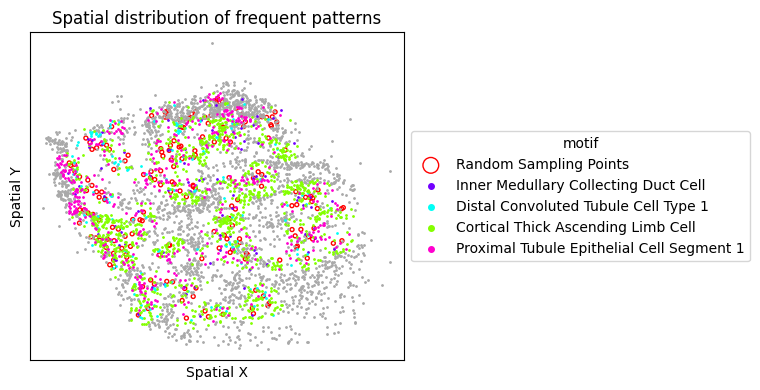

In [18]:
motif = ['Proximal Tubule Epithelial Cell Segment 1', 
         'Cortical Thick Ascending Limb Cell', 
         'Inner Medullary Collecting Duct Cell', 
         'Distal Convoluted Tubule Cell Type 1']
tt.plot_motif_rand(motif=motif, max_dist=max_dist, 
                   n_points=n_points, 
                   min_count=min_count, 
                   min_support=min_support,
                   dis_duplicates=dis_duplicates,
                   min_size=min_size,
                   fig_size=(7,4),
                  )

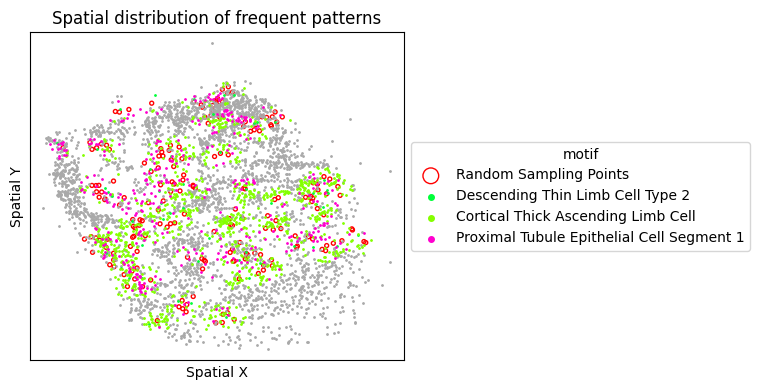

In [19]:
motif = ['Cortical Thick Ascending Limb Cell', 
         'Proximal Tubule Epithelial Cell Segment 1', 
         'Descending Thin Limb Cell Type 2']
tt.plot_motif_rand(motif=motif, max_dist=max_dist, 
                   n_points=n_points, 
                   min_count=min_count, 
                   min_support=min_support,
                   dis_duplicates=dis_duplicates,
                   min_size=min_size,
                   fig_size=(7,4),
                  )

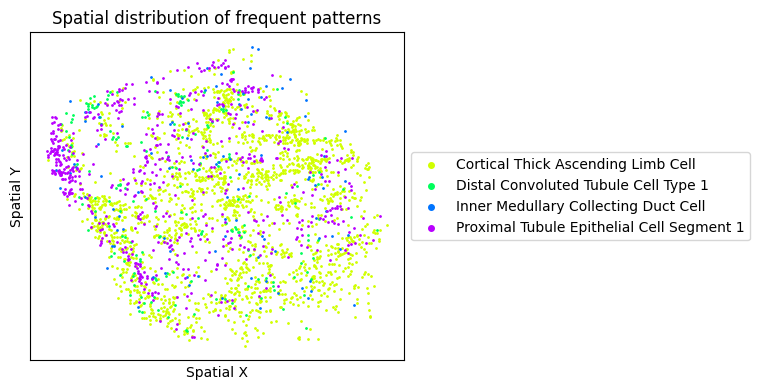

In [20]:
max_dist = 150
n_points = 1000
min_support = 0.5
min_size = 4
min_count = 10
dis_duplicates = True
fp_tree = tt.find_patterns_rand(max_dist=max_dist,
                                n_points=n_points,
                                min_support=min_support,
                                dis_duplicates=dis_duplicates,
                                min_size=min_size,
                                min_count=min_count,
                                if_display=True,
                                fig_size=(7, 4), 
                                seed=0)

In [21]:
fp_tree

,support,itemsets
0,0.535461,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
1,0.526596,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
2,0.521277,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
3,0.510638,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
4,0.503546,"[Cortical Thick Ascending Limb Cell, Inner Medullary Collecting Duct Cell]"
5,0.501773,"[Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell, Distal Convoluted Tubule Cell Type 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Cortical Thick Ascending Limb Cell]"
6,0.501773,"[Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell, Proximal Tubule Epithelial Cell Segment 1, Cortical Thick Ascending Limb Cell]"


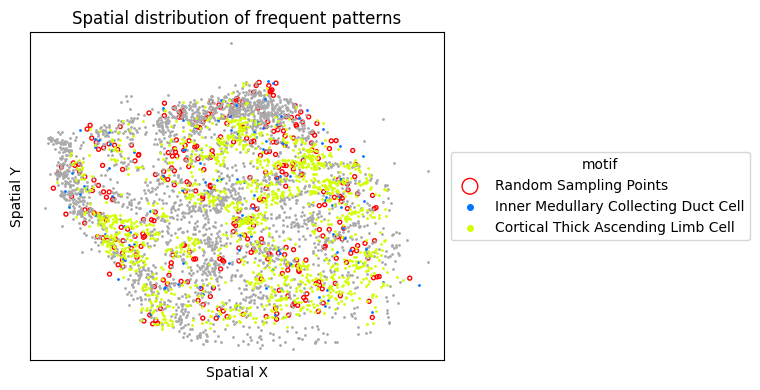

In [22]:
motif = ['Cortical Thick Ascending Limb Cell', 
         'Inner Medullary Collecting Duct Cell']
dis_duplicates = True
min_support = 0.5
tt.plot_motif_rand(motif=motif, max_dist=max_dist, 
                   n_points=n_points, 
                   min_count=min_count, 
                   min_support=min_support,
                   dis_duplicates=dis_duplicates,
                   min_size=min_size,
                   fig_size=(7,4),
                  )

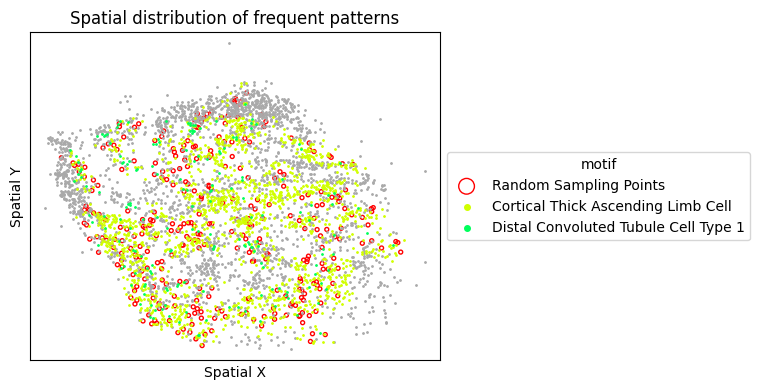

In [23]:
motif = ['Distal Convoluted Tubule Cell Type 1', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell', 
         'Cortical Thick Ascending Limb Cell']
dis_duplicates = True
min_support = 0.5
tt.plot_motif_rand(motif=motif, max_dist=max_dist, 
                   n_points=n_points, 
                   min_count=min_count, 
                   min_support=min_support,
                   dis_duplicates=dis_duplicates,
                   min_size=min_size,
                   fig_size=(7,4),
                  )

In [24]:
ct_center = "Fibroblast"
k = 20
motifs = [['Inner Medullary Collecting Duct Cell', 'Proximal Tubule Epithelial Cell Segment 1'],
          ['Vascular Smooth Muscle Cell/Pericyte (general)', 'Proximal Tubule Epithelial Cell Segment 1'], 
          ['Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Proximal Tubule Epithelial Cell Segment 1']]
motif_enrichment_out = pd.DataFrame(columns=['center', 'motifs', 'n_center_motif', 
                                             'n_center', 'n_motif', 'p-val'])
for motif in motifs:
    out = tt.motif_enrichment_knn(ct=ct_center, k=k,
                                  motifs=motif)
    motif_enrichment_out = pd.concat([motif_enrichment_out, out])
motif_enrichment_out = motif_enrichment_out.sort_values(by='p-val', ignore_index=True)
motif_enrichment_out

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Proximal Tubule Epithelial Cell Segment 1, Vascular Smooth Muscle Cell/Pericyte (general), Vascular Smooth Muscle Cell/Pericyte (general)]",60,290,241,4.914952e-20
1,Fibroblast,"[Proximal Tubule Epithelial Cell Segment 1, Vascular Smooth Muscle Cell/Pericyte (general)]",76,290,373,1.607689e-19
2,Fibroblast,"[Inner Medullary Collecting Duct Cell, Proximal Tubule Epithelial Cell Segment 1]",59,290,1295,9.999962e-01


In [25]:
ct_center = "Fibroblast"
max_dist = 100
motifs = [['Inner Medullary Collecting Duct Cell', 'Proximal Tubule Epithelial Cell Segment 1'],
          ['Vascular Smooth Muscle Cell/Pericyte (general)', 'Proximal Tubule Epithelial Cell Segment 1'], 
          ['Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Proximal Tubule Epithelial Cell Segment 1']]
motif_enrichment_out = pd.DataFrame(columns=['center', 'motifs', 'n_center_motif', 
                                             'n_center', 'n_motif', 'p-val'])
for motif in motifs:
    out = tt.motif_enrichment_dist(ct='Fibroblast', motifs=motif,
                                   max_dist=max_dist,)
    motif_enrichment_out = pd.concat([motif_enrichment_out, out])
motif_enrichment_out = motif_enrichment_out.sort_values(by='p-val', ignore_index=True)
motif_enrichment_out

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Proximal Tubule Epithelial Cell Segment 1, Vascular Smooth Muscle Cell/Pericyte (general)]",128,290,454,3.152511e-52
1,Fibroblast,"[Proximal Tubule Epithelial Cell Segment 1, Vascular Smooth Muscle Cell/Pericyte (general), Vascular Smooth Muscle Cell/Pericyte (general)]",107,290,312,5.178915e-52
2,Fibroblast,"[Inner Medullary Collecting Duct Cell, Proximal Tubule Epithelial Cell Segment 1]",110,290,1170,2.034953e-04


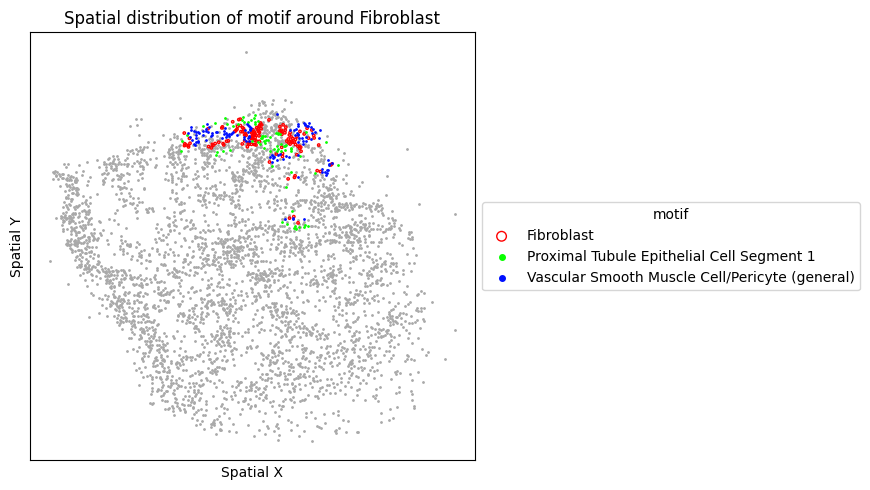

In [26]:
tt.plot_motif_celltype(ct=ct_center, motif=['Proximal Tubule Epithelial Cell Segment 1', 
                                            'Vascular Smooth Muscle Cell/Pericyte (general)'], 
                       max_dist=max_dist, 
                       fig_size=(8,5))

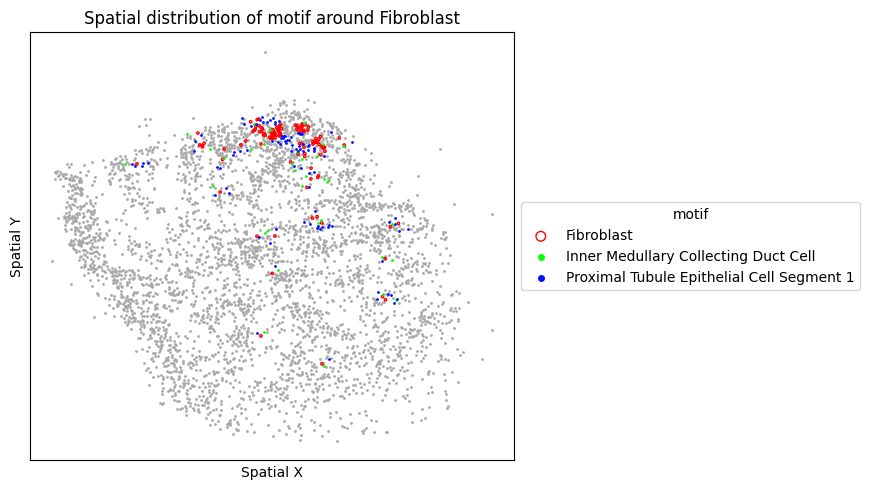

In [27]:
motif=['Inner Medullary Collecting Duct Cell', 'Proximal Tubule Epithelial Cell Segment 1']
tt.plot_motif_celltype(ct=ct_center, motif=motif, 
                       max_dist=max_dist, 
                       fig_size=(8,5))

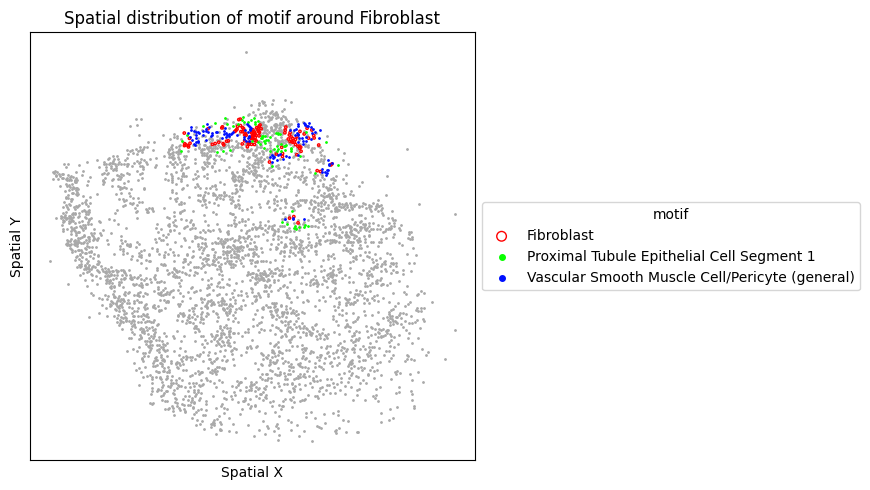

In [28]:
motif=['Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Vascular Smooth Muscle Cell/Pericyte (general)', 
          'Proximal Tubule Epithelial Cell Segment 1']
tt.plot_motif_celltype(ct=ct_center, motif=motif, 
                       max_dist=max_dist, 
                       fig_size=(8,5))


In [29]:
k = 20
dis_duplicates = True
out = tt.motif_enrichment_knn(ct=ct_center, k=k, min_support=min_support, dis_duplicates=dis_duplicates)

In [30]:
out

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Fibroblast]",157,145,564,0.000000e+00
1,Fibroblast,"[Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast]",155,29,246,0.000000e+00
2,Fibroblast,"[Fibroblast, Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",156,145,441,0.000000e+00
3,Fibroblast,"[Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",151,290,964,3.895780e-28


In [31]:
out = tt.motif_enrichment_knn(ct=ct_center, k=k, min_support=min_support,dis_duplicates=False)
out


,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",158,290,499,2.860804e-76
1,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast]",164,290,1039,4.803456e-32
2,Fibroblast,"[Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",151,290,964,3.895780e-28


In [32]:
out = tt.motif_enrichment_dist(ct='Fibroblast',
                               max_dist=100, min_support=0.6, min_size=4, min_count=10, 
                               dis_duplicates=True)
out

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Fibroblast, Fibroblast, Fibroblast]",180,72,416,0.000000e+00
1,Fibroblast,"[Fibroblast, Fibroblast, Fibroblast, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",176,72,401,0.000000e+00
2,Fibroblast,"[Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast, Fibroblast]",174,21,275,0.000000e+00
3,Fibroblast,"[Fibroblast, Fibroblast, Fibroblast, Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",178,72,384,0.000000e+00
4,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",177,290,797,5.570891e-60


In [33]:
out = tt.motif_enrichment_dist(ct='Fibroblast',
                               max_dist=100, min_support=0.4, min_size=4, min_count=10, 
                               dis_duplicates=False)
out

,center,motifs,n_center_motif,n_center,n_motif,p-val
0,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Vascular Smooth Muscle Cell/Pericyte (general)]",148,290,438,7.347690e-75
1,Fibroblast,"[Fibroblast, Proximal Tubule Epithelial Cell Segment 1, Vascular Smooth Muscle Cell/Pericyte (general)]",128,290,394,1.605922e-60
2,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Proximal Tubule Epithelial Cell Segment 1]",177,290,797,5.570891e-60
3,Fibroblast,"[Cortical Thick Ascending Limb Cell, Fibroblast, Inner Medullary Collecting Duct Cell]",116,290,491,7.872814e-38
